In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from plot_utils import *

## TODO: Considera solo i tempi durante la fase "train"

## PLOT DA FARE: 
1. Metti a confronto per ogni modello le curve di speedup così da fare vedere l'impatto del miniatch;
2. Per ogni minibatch confronta le curve di speedup tra i vari modelli così da mostrare l'impatto del modello.

## Statistiche:
1. Quantità di memoria usata;
2. Dati trasmessi tramite la rete.

# Minibatch Comparison

In [73]:
ddp_2_64 = pd.read_csv("../log/rank_0_synch_ddp_2_minibatch_64_vit-base-patch16-224-in21k_model.csv")
ddp_4_64 = pd.read_csv("../log/rank_0_synch_ddp_4_minibatch_64_vit-base-patch16-224-in21k_model.csv")

ddp_2 = ddp_2_64[ddp_2_64["phase"] == "train"]
ddp_4_64 = ddp_4_64[ddp_4_64["phase"] == "train"]

ddp_2_128 = pd.read_csv("../log/rank_0_synch_ddp_2_minibatch_128_vit-base-patch16-224-in21k_model.csv")
ddp_4_128 = pd.read_csv("../log/rank_0_synch_ddp_4_minibatch_128_vit-base-patch16-224-in21k_model.csv")

ddp_2_128 = ddp_2_128[ddp_2_128["phase"] == "train"]
ddp_4_128 = ddp_4_128[ddp_4_128["phase"] == "train"]


ddp_2 = pd.read_csv("../log/rank_0_synch_ddp_2_minibatch_256_vit-base-patch16-224-in21k_model.csv")
ddp_4 = pd.read_csv("../log/rank_0_synch_ddp_4_minibatch_256_vit-base-patch16-224-in21k_model.csv")
ddp_8 = pd.read_csv("../log/rank_0_synch_ddp_8_minibatch_256_vit-base-patch16-224-in21k_model.csv")

ddp_2 = ddp_2[ddp_2["phase"] == "train"]
ddp_4 = ddp_4[ddp_4["phase"] == "train"]
ddp_8 = ddp_8[ddp_8["phase"] == "train"]

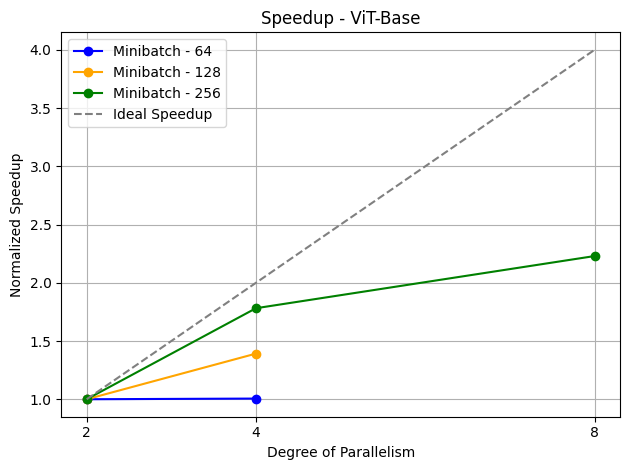

In [74]:
plot_speedup([ddp_2_64, ddp_4_64], "Speedup - ViT-Base", "Minibatch - 64", color='blue', plot_ideal=False)
plot_speedup([ddp_2_128, ddp_4_128], "Speedup - ViT-Base", "Minibatch - 128", color='orange', plot_ideal=False)
plot_speedup([ddp_2, ddp_4, ddp_8], "Speedup - ViT-Base", "Minibatch - 256", color='green', plot_ideal=True)

plt.tight_layout()

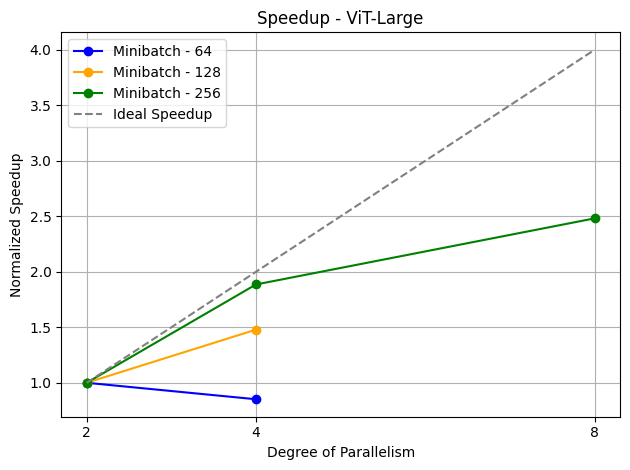

In [72]:
ddp_2_64 = pd.read_csv("../log/rank_0_synch_ddp_2_minibatch_64_vit-large-patch16-224-in21k_model.csv")
ddp_4_64 = pd.read_csv("../log/rank_0_synch_ddp_4_minibatch_64_vit-large-patch16-224-in21k_model.csv")
ddp_2_64 = ddp_2_64[ddp_2_64["phase"] == "train"]
ddp_4_64 = ddp_4_64[ddp_4_64["phase"] == "train"]
ddp_2_128 = pd.read_csv("../log/rank_0_synch_ddp_2_minibatch_128_vit-large-patch16-224-in21k_model.csv")
ddp_4_128 = pd.read_csv("../log/rank_0_synch_ddp_4_minibatch_128_vit-large-patch16-224-in21k_model.csv")
ddp_2_128 = ddp_2_128[ddp_2_128["phase"] == "train"]
ddp_4_128 = ddp_4_128[ddp_4_128["phase"] == "train"]
ddp_2 = pd.read_csv("../log/rank_0_synch_ddp_2_minibatch_256_vit-large-patch16-224-in21k_model.csv")
ddp_4 = pd.read_csv("../log/rank_0_synch_ddp_4_minibatch_256_vit-large-patch16-224-in21k_model.csv")
ddp_8 = pd.read_csv("../log/rank_0_synch_ddp_8_minibatch_256_vit-large-patch16-224-in21k_model.csv")
ddp_2 = ddp_2[ddp_2["phase"] == "train"]
ddp_4 = ddp_4[ddp_4["phase"] == "train"]
ddp_8 = ddp_8[ddp_8["phase"] == "train"]
plot_speedup([ddp_2_64, ddp_4_64], "Speedup - ViT-Large", "Minibatch - 64", color='blue', plot_ideal=False)
plot_speedup([ddp_2_128, ddp_4_128], "Speedup - ViT-Large", "Minibatch - 128", color='orange', plot_ideal=False)
plot_speedup([ddp_2, ddp_4, ddp_8], "Speedup - ViT-Large", "Minibatch - 256", color='green', plot_ideal=True)
plt.tight_layout()

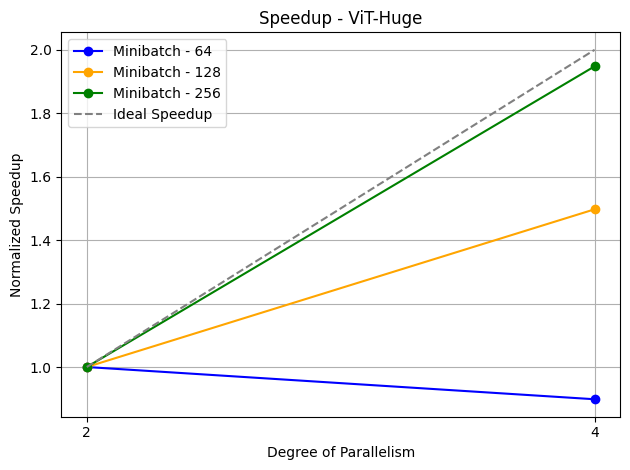

In [76]:
ddp_2_64 = pd.read_csv("../log/rank_0_synch_ddp_2_minibatch_64_vit-huge-patch14-224-in21k_model.csv")
ddp_4_64 = pd.read_csv("../log/rank_0_synch_ddp_4_minibatch_64_vit-huge-patch14-224-in21k_model.csv")
ddp_2_64 = ddp_2_64[ddp_2_64["phase"] == "train"]
ddp_4_64 = ddp_4_64[ddp_4_64["phase"] == "train"]
ddp_2_128 = pd.read_csv("../log/rank_0_synch_ddp_2_minibatch_128_vit-huge-patch14-224-in21k_model.csv")
ddp_4_128 = pd.read_csv("../log/rank_0_synch_ddp_4_minibatch_128_vit-huge-patch14-224-in21k_model.csv")
ddp_2_128 = ddp_2_128[ddp_2_128["phase"] == "train"]
ddp_4_128 = ddp_4_128[ddp_4_128["phase"] == "train"]
ddp_2 = pd.read_csv("../log/rank_0_synch_ddp_2_minibatch_256_vit-huge-patch14-224-in21k_model.csv")
ddp_4 = pd.read_csv("../log/rank_0_synch_ddp_4_minibatch_256_vit-huge-patch14-224-in21k_model.csv")
# ddp_8 = pd.read_csv("../log/rank_0_synch_ddp_8_minibatch_256_vit-huge-patch14-224-in21k_model.csv")
ddp_2 = ddp_2[ddp_2["phase"] == "train"]
ddp_4 = ddp_4[ddp_4["phase"] == "train"]
# ddp_8 = ddp_8[ddp_8["phase"] == "train"]
plot_speedup([ddp_2_64, ddp_4_64], "Speedup - ViT-Huge", "Minibatch - 64", color='blue', plot_ideal=False)
plot_speedup([ddp_2_128, ddp_4_128], "Speedup - ViT-Huge", "Minibatch - 128", color='orange', plot_ideal=False)
plot_speedup([ddp_2, ddp_4], "Speedup - ViT-Huge", "Minibatch - 256", color='green', plot_ideal=True)
plt.tight_layout()

## Model Comparison

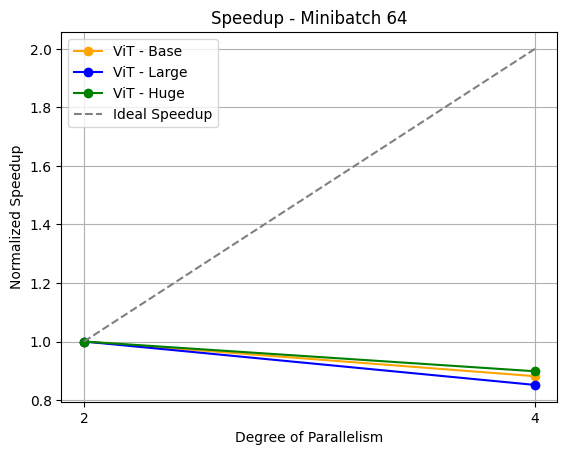

In [67]:
ddp_2_large = pd.read_csv("../log/rank_0_synch_ddp_2_minibatch_64_vit-large-patch16-224-in21k_model.csv")
ddp_4_large = pd.read_csv("../log/rank_0_synch_ddp_4_minibatch_64_vit-large-patch16-224-in21k_model.csv")

ddp_2_base = pd.read_csv("../log/rank_0_synch_ddp_2_minibatch_64_vit-base-patch16-224-in21k_model.csv")
ddp_4_base = pd.read_csv("../log/rank_0_synch_ddp_4_minibatch_64_vit-base-patch16-224-in21k_model.csv")

ddp_2_huge = pd.read_csv("../log/rank_0_synch_ddp_2_minibatch_64_vit-huge-patch14-224-in21k_model.csv")
ddp_4_huge = pd.read_csv("../log/rank_0_synch_ddp_4_minibatch_64_vit-huge-patch14-224-in21k_model.csv")

ddp_2_large = ddp_2_large[ddp_2_large["phase"] == "train"]
ddp_4_large = ddp_4_large[ddp_4_large["phase"] == "train"]
ddp_2_base = ddp_2_base[ddp_2_base["phase"] == "train"]
ddp_4_base = ddp_4_base[ddp_4_base["phase"] == "train"]
ddp_2_huge = ddp_2_huge[ddp_2_huge["phase"] == "train"]
ddp_4_huge = ddp_4_huge[ddp_4_huge["phase"] == "train"]

plot_speedup([ddp_2_base, ddp_4_base], "Speedup - Minibatch 64", "ViT - Base", color='orange', plot_ideal=False)
plot_speedup([ddp_2_large, ddp_4_large], "Speedup - Minibatch 64", "ViT - Large", color='blue', plot_ideal=False)
plot_speedup([ddp_2_huge, ddp_4_huge], "Speedup - Minibatch 64", "ViT - Huge", color='green', plot_ideal=True)

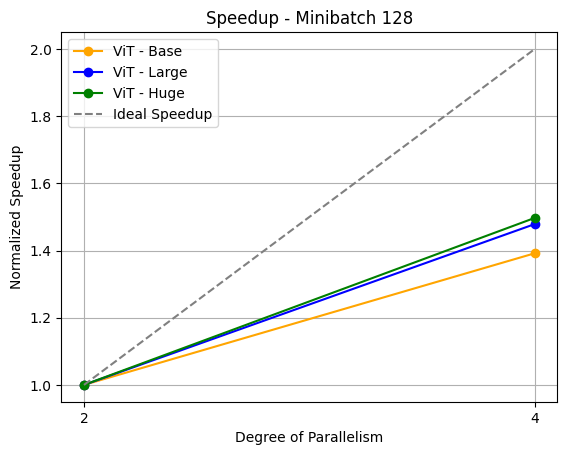

In [68]:
ddp_2_large = pd.read_csv("../log/rank_0_synch_ddp_2_minibatch_128_vit-large-patch16-224-in21k_model.csv")
ddp_4_large = pd.read_csv("../log/rank_0_synch_ddp_4_minibatch_128_vit-large-patch16-224-in21k_model.csv")
ddp_2_base = pd.read_csv("../log/rank_0_synch_ddp_2_minibatch_128_vit-base-patch16-224-in21k_model.csv")
ddp_4_base = pd.read_csv("../log/rank_0_synch_ddp_4_minibatch_128_vit-base-patch16-224-in21k_model.csv")
ddp_2_huge = pd.read_csv("../log/rank_0_synch_ddp_2_minibatch_128_vit-huge-patch14-224-in21k_model.csv")
ddp_4_huge = pd.read_csv("../log/rank_0_synch_ddp_4_minibatch_128_vit-huge-patch14-224-in21k_model.csv")
ddp_2_large = ddp_2_large[ddp_2_large["phase"] == "train"]
ddp_4_large = ddp_4_large[ddp_4_large["phase"] == "train"]  
ddp_2_base = ddp_2_base[ddp_2_base["phase"] == "train"]
ddp_4_base = ddp_4_base[ddp_4_base["phase"] == "train"]
ddp_2_huge = ddp_2_huge[ddp_2_huge["phase"] == "train"]
ddp_4_huge = ddp_4_huge[ddp_4_huge["phase"] == "train"]
plot_speedup([ddp_2_base, ddp_4_base], "Speedup - Minibatch 128", "ViT - Base", color='orange', plot_ideal=False)
plot_speedup([ddp_2_large, ddp_4_large], "Speedup - Minibatch 128", "ViT - Large", color='blue', plot_ideal=False)
plot_speedup([ddp_2_huge, ddp_4_huge], "Speedup - Minibatch 128", "ViT - Huge", color='green', plot_ideal=True)

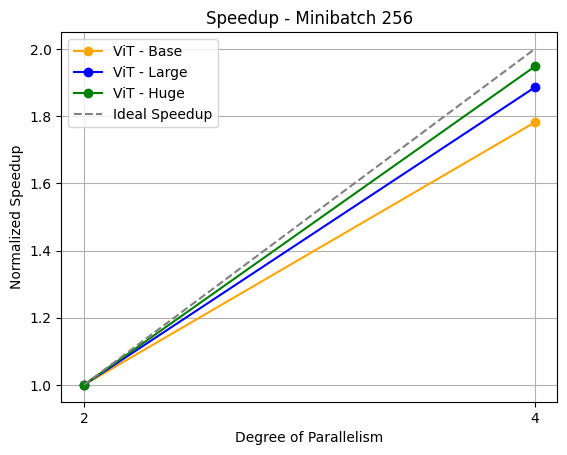

In [69]:
ddp_2_large = pd.read_csv("../log/rank_0_synch_ddp_2_minibatch_256_vit-large-patch16-224-in21k_model.csv")
ddp_4_large = pd.read_csv("../log/rank_0_synch_ddp_4_minibatch_256_vit-large-patch16-224-in21k_model.csv")
ddp_2_base = pd.read_csv("../log/rank_0_synch_ddp_2_minibatch_256_vit-base-patch16-224-in21k_model.csv")
ddp_4_base = pd.read_csv("../log/rank_0_synch_ddp_4_minibatch_256_vit-base-patch16-224-in21k_model.csv")
ddp_2_huge = pd.read_csv("../log/rank_0_synch_ddp_2_minibatch_256_vit-huge-patch14-224-in21k_model.csv")
ddp_4_huge = pd.read_csv("../log/rank_0_synch_ddp_4_minibatch_256_vit-huge-patch14-224-in21k_model.csv")
ddp_2_large = ddp_2_large[ddp_2_large["phase"] == "train"]
ddp_4_large = ddp_4_large[ddp_4_large["phase"] == "train"]
ddp_2_base = ddp_2_base[ddp_2_base["phase"] == "train"]
ddp_4_base = ddp_4_base[ddp_4_base["phase"] == "train"]
ddp_2_huge = ddp_2_huge[ddp_2_huge["phase"] == "train"]
ddp_4_huge = ddp_4_huge[ddp_4_huge["phase"] == "train"]
plot_speedup([ddp_2_base, ddp_4_base], "Speedup - Minibatch 256", "ViT - Base", color='orange', plot_ideal=False)
plot_speedup([ddp_2_large, ddp_4_large], "Speedup - Minibatch 256", "ViT - Large", color='blue', plot_ideal=False)
plot_speedup([ddp_2_huge, ddp_4_huge], "Speedup - Minibatch 256", "ViT - Huge", color='green', plot_ideal=True)

# Model Large

## Minibatch 64

In [18]:
ddp_2 = pd.read_csv("../log/rank_0_synch_ddp_2_minibatch_64_vit-large-patch16-224-in21k_model.csv")
ddp_4 = pd.read_csv("../log/rank_0_synch_ddp_4_minibatch_64_vit-large-patch16-224-in21k_model.csv")

ddp_2 = ddp_2[ddp_2["phase"] == "train"]
ddp_4 = ddp_4[ddp_4["phase"] == "train"]

ddp_2["minibatch_time"] = ddp_2["forward_time"] + ddp_2["backward_time"]
ddp_4["minibatch_time"] = ddp_4["forward_time"] + ddp_4["backward_time"]

In [19]:
ddp_2.describe()

,epoch,batch_id,loss,forward_time,backward_time,peak_memory_usage(MB),minibatch_time
count,947.0,947.000000,947.000000,947.000000,947.000000,947.000000,947.000000
mean,0.0,473.000000,0.959934,4.548175,10.842148,22626.543893,15.390323
std,0.0,273.519652,0.630278,0.061565,0.399503,411.519940,0.450042
min,0.0,0.000000,0.164053,4.127904,10.723365,14915.394531,14.908000
25%,0.0,236.500000,0.619434,4.527635,10.764079,22442.960938,15.312639
50%,0.0,473.000000,0.817525,4.543808,10.792057,22617.738281,15.347970
75%,0.0,709.500000,1.077714,4.560462,10.860208,22788.761719,15.401420
max,0.0,946.000000,4.641535,6.109727,22.424093,26630.656250,28.533820


In [20]:
ddp_4.describe()

,epoch,batch_id,loss,forward_time,backward_time,peak_memory_usage(MB),minibatch_time
count,947.0,947.000000,947.000000,947.000000,947.000000,947.000000,947.000000
mean,0.0,473.000000,0.988605,2.339443,15.731344,14335.631592,18.070787
std,0.0,273.519652,0.677369,0.061668,0.349469,278.390367,0.390841
min,0.0,0.000000,0.048766,2.068234,15.633510,8457.152344,17.827895
25%,0.0,236.500000,0.583410,2.311015,15.671219,14223.001953,18.008513
50%,0.0,473.000000,0.854393,2.327489,15.705707,14327.152344,18.049942
75%,0.0,709.500000,1.194474,2.351577,15.754497,14426.408203,18.095243
max,0.0,946.000000,4.581965,3.583461,26.286566,15994.468750,29.870028


In [21]:
ddp_2["minibatch_time"].sum(), ddp_4["minibatch_time"].sum()

(np.float64(14574.635562419891), np.float64(17113.035032510757))

## Minibatch 128

In [22]:
ddp_2 = pd.read_csv("../log/rank_0_synch_ddp_2_minibatch_128_vit-large-patch16-224-in21k_model.csv")
ddp_4 = pd.read_csv("../log/rank_0_synch_ddp_4_minibatch_128_vit-large-patch16-224-in21k_model.csv")

ddp_2 = ddp_2[ddp_2["phase"] == "train"]
ddp_4 = ddp_4[ddp_4["phase"] == "train"]

ddp_2["minibatch_time"] = ddp_2["forward_time"] + ddp_2["backward_time"]
ddp_4["minibatch_time"] = ddp_4["forward_time"] + ddp_4["backward_time"]

In [23]:
ddp_2.describe()

,epoch,batch_id,loss,forward_time,backward_time,peak_memory_usage(MB),minibatch_time
count,474.0,474.000000,474.000000,474.000000,474.000000,474.000000,474.000000
mean,0.0,236.500000,0.998666,9.794258,20.481039,26909.435951,30.275296
std,0.0,136.976275,0.704088,0.276365,0.796703,483.850311,1.022363
min,0.0,0.000000,0.311417,4.214372,10.752244,17669.777344,14.966616
25%,0.0,118.250000,0.650405,9.773400,20.218480,26893.196289,30.019925
50%,0.0,236.500000,0.806544,9.797538,20.433611,26941.312500,30.243341
75%,0.0,354.750000,1.004001,9.826617,20.702723,26990.595703,30.493773
max,0.0,473.000000,4.638955,11.786717,33.116829,27055.980469,44.903546


In [24]:
ddp_4.describe()

,epoch,batch_id,loss,forward_time,backward_time,peak_memory_usage(MB),minibatch_time
count,474.0,474.000000,474.000000,474.000000,474.000000,474.000000,474.000000
mean,0.0,236.500000,0.992993,4.623764,15.849203,22150.032882,20.472967
std,0.0,136.976275,0.731653,0.149777,0.681572,703.226290,0.774792
min,0.0,0.000000,0.174899,2.113426,15.725574,11814.265625,17.938506
25%,0.0,118.250000,0.607497,4.597881,15.779650,21901.383789,20.405039
50%,0.0,236.500000,0.804245,4.617775,15.803826,22098.064453,20.435055
75%,0.0,354.750000,1.070698,4.647305,15.845758,22294.614258,20.467179
max,0.0,473.000000,4.612364,6.444641,30.606289,25863.601562,37.050931


In [25]:
ddp_2["minibatch_time"].sum(), ddp_4["minibatch_time"].sum()

(np.float64(14350.49048614502), np.float64(9704.186350345612))

## Minibatch 256

In [ ]:
ddp_2 = pd.read_csv("../log/rank_0_synch_ddp_2_minibatch_256_vit-large-patch16-224-in21k_model.csv")
ddp_4 = pd.read_csv("../log/rank_0_synch_ddp_4_minibatch_256_vit-large-patch16-224-in21k_model.csv")
ddp_8 = pd.read_csv("../log/rank_0_synch_ddp_8_minibatch_256_vit-large-patch16-224-in21k_model.csv")

ddp_2 = ddp_2[ddp_2["phase"] == "train"]
ddp_4 = ddp_4[ddp_4["phase"] == "train"]
ddp_8 = ddp_8[ddp_8["phase"] == "train"]

ddp_2["minibatch_time"] = ddp_2["forward_time"] + ddp_2["backward_time"]
ddp_4["minibatch_time"] = ddp_4["forward_time"] + ddp_4["backward_time"]
ddp_8["minibatch_time"] = ddp_8["forward_time"] + ddp_8["backward_time"]

: 

: 

: 

In [ ]:
ddp_2.describe()

,epoch,batch_id,loss,forward_time,backward_time,peak_memory_usage(MB),minibatch_time
count,237.0,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000
mean,0.0,118.000000,1.071564,18.705361,38.657577,47358.545622,57.362938
std,0.0,68.560193,0.825886,0.382067,1.383479,815.671977,1.587513
min,0.0,0.000000,0.378126,13.475581,30.483085,35993.179688,43.958666
25%,0.0,59.000000,0.648561,18.611402,37.925959,47394.136719,56.612422
50%,0.0,118.000000,0.768725,18.703798,38.122653,47417.898438,56.922635
75%,0.0,177.000000,1.043947,18.819683,39.103238,47492.554688,57.996531
max,0.0,236.000000,4.621063,20.252036,50.179415,47730.367188,70.431451


: 

: 

: 

In [ ]:
ddp_4.describe()

,epoch,batch_id,loss,forward_time,backward_time,peak_memory_usage(MB),minibatch_time
count,237.0,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000
mean,0.0,118.000000,1.074134,9.488114,20.930617,27075.424281,30.418731
std,0.0,68.560193,0.835109,0.207973,1.371149,499.627893,1.518985
min,0.0,0.000000,0.336417,6.833165,16.302825,21253.105469,23.135990
25%,0.0,59.000000,0.636081,9.468333,20.608850,27093.054688,30.095229
50%,0.0,118.000000,0.781240,9.489144,20.748932,27136.277344,30.232972
75%,0.0,177.000000,1.059738,9.511075,21.045363,27151.941406,30.528412
max,0.0,236.000000,4.654000,11.162753,40.605302,27201.855469,51.768055


: 

: 

: 

In [ ]:
ddp_8.describe()

,epoch,batch_id,loss,forward_time,backward_time,peak_memory_usage(MB),minibatch_time
count,237.0,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000
mean,0.0,118.000000,1.078700,4.551615,18.566948,22623.001599,23.118563
std,0.0,68.560193,0.848475,0.144192,1.227827,785.762409,1.313893
min,0.0,0.000000,0.160560,3.284855,18.312783,14939.242188,21.747307
25%,0.0,59.000000,0.615042,4.517646,18.428498,22312.132812,22.971000
50%,0.0,118.000000,0.827790,4.540602,18.480300,22484.613281,23.024823
75%,0.0,177.000000,1.083312,4.562979,18.538038,22729.945312,23.085490
max,0.0,236.000000,4.674962,5.814012,37.340506,25707.300781,43.154517


: 

: 

: 

In [ ]:
ddp_2["minibatch_time"].sum(), ddp_4["minibatch_time"].sum(), ddp_8["minibatch_time"].sum()

(np.float64(13595.01642203331),
 np.float64(7209.239175319672),
 np.float64(5479.099380493164))

: 

: 

: 

# Model Huge

## Minibatch 64

In [ ]:
ddp_2 = pd.read_csv("../log/rank_0_synch_ddp_2_minibatch_64_vit-huge-patch14-224-in21k_model.csv")
ddp_4 = pd.read_csv("../log/rank_0_synch_ddp_4_minibatch_64_vit-huge-patch14-224-in21k_model.csv")

ddp_2 = ddp_2[ddp_2["phase"] == "train"]
ddp_4 = ddp_4[ddp_4["phase"] == "train"]

ddp_2["minibatch_time"] = ddp_2["forward_time"] + ddp_2["backward_time"]
ddp_4["minibatch_time"] = ddp_4["forward_time"] + ddp_4["backward_time"]

: 

: 

In [ ]:
ddp_2.describe()

,epoch,batch_id,loss,forward_time,backward_time,peak_memory_usage(MB),minibatch_time
count,947.0,947.000000,947.000000,947.000000,947.000000,947.000000,947.000000
mean,0.0,473.000000,1.620153,10.916446,23.513923,32898.992662,34.430369
std,0.0,273.519652,1.084867,0.098535,0.908211,313.598769,0.984528
min,0.0,0.000000,0.276955,9.652237,22.283745,24870.160156,31.935982
25%,0.0,236.500000,0.843158,10.885362,23.205224,32834.251953,34.115489
50%,0.0,473.000000,1.178347,10.911478,23.373985,32889.488281,34.280249
75%,0.0,709.500000,2.064493,10.947935,23.700533,32954.281250,34.629913
max,0.0,946.000000,4.612998,13.273218,48.283123,34408.441406,61.556341


: 

: 

In [ ]:
ddp_4.describe()

,epoch,batch_id,loss,forward_time,backward_time,peak_memory_usage(MB),minibatch_time
count,947.0,947.000000,947.000000,947.000000,947.000000,947.000000,947.000000
mean,0.0,473.000000,1.621712,5.692423,32.631710,29584.895752,38.324133
std,0.0,273.519652,1.109684,0.092688,0.592048,662.793188,0.659260
min,0.0,0.000000,0.145248,5.056458,32.477443,13898.078125,37.701733
25%,0.0,236.500000,0.823037,5.645157,32.523203,29372.896484,38.234892
50%,0.0,473.000000,1.239596,5.679637,32.588236,29553.660156,38.282210
75%,0.0,709.500000,2.148699,5.729599,32.672586,29794.003906,38.348175
max,0.0,946.000000,4.618061,7.827787,50.520484,32509.957031,58.348271


: 

: 

In [ ]:
ddp_2["minibatch_time"].sum(), ddp_4["minibatch_time"].sum()

(np.float64(32605.559341430664), np.float64(36292.95387530327))

: 

: 

## Minibatch 128

In [26]:
ddp_2 = pd.read_csv("../log/rank_0_synch_ddp_2_minibatch_128_vit-huge-patch14-224-in21k_model.csv")
ddp_4 = pd.read_csv("../log/rank_0_synch_ddp_4_minibatch_128_vit-huge-patch14-224-in21k_model.csv")

ddp_2 = ddp_2[ddp_2["phase"] == "train"]
ddp_4 = ddp_4[ddp_4["phase"] == "train"]

ddp_2["minibatch_time"] = ddp_2["forward_time"] + ddp_2["backward_time"]
ddp_4["minibatch_time"] = ddp_4["forward_time"] + ddp_4["backward_time"]

In [27]:
ddp_2.describe()

,epoch,batch_id,loss,forward_time,backward_time,peak_memory_usage(MB),minibatch_time
count,474.0,474.000000,474.000000,474.000000,474.000000,474.000000,474.000000
mean,0.0,236.500000,2.041943,20.764940,44.671420,57321.180248,65.436361
std,0.0,136.976275,1.139522,0.529946,1.679545,1273.338096,2.107796
min,0.0,0.000000,0.548186,9.587463,22.366322,32029.378906,31.953785
25%,0.0,118.250000,1.128246,20.750718,44.094851,57289.723633,64.855746
50%,0.0,236.500000,1.573404,20.767467,44.476323,57333.041016,65.250614
75%,0.0,354.750000,2.851890,20.795218,45.132032,57528.449219,65.945591
max,0.0,473.000000,4.625878,23.299074,68.747637,57877.324219,92.046711


In [28]:
ddp_4.describe()

,epoch,batch_id,loss,forward_time,backward_time,peak_memory_usage(MB),minibatch_time
count,474.0,474.000000,474.000000,474.000000,474.000000,474.000000,474.000000
mean,0.0,236.500000,2.031621,10.916449,32.789422,34560.649130,43.705871
std,0.0,136.976275,1.139341,0.274641,1.251932,667.790075,1.346541
min,0.0,0.000000,0.539403,5.278074,32.518694,23796.371094,37.796768
25%,0.0,118.250000,1.141133,10.892547,32.682216,34593.692383,43.612691
50%,0.0,236.500000,1.582705,10.921637,32.718067,34594.558594,43.651156
75%,0.0,354.750000,2.834491,10.971604,32.757808,34619.478516,43.700694
max,0.0,473.000000,4.613140,12.382788,59.937693,34860.410156,72.320482


In [29]:
ddp_2["minibatch_time"].sum(), ddp_4["minibatch_time"].sum()

(np.float64(31016.834914684296), np.float64(20716.582660913467))